In [1]:
%pylab inline
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb

# Multivariate Analysis 

**Source signal**: $Z'$ vector boson. $M_Z'$  = __2000 $GeV$__

The data analysis is divided in two stages:

1. **Initial Cuts $C_0$** : Following uniandes HEP group research, it were made several initial cuts $C_0$ in order to reduce part of QCD background. These cuts were: 
    - $N_{jets} > 1$  and $N_{\tau} > 1$
    - $Q^1_{\tau}*Q^2_{\tau} < 0$
    - $\eta^1_{jets}*\eta^2_{jets} < 0$
    
*Note* : it were selected the $\tau$ and $jets$ with the highest $p_T$ 


These cuts were applied over the *signal_2p0TeV*, *DY+jets* and *W+jets* samples. From those cuts we get a sample called full_sample (it is not the full original simulated sample).

2. **MVA**: Finally, to implement the MVA analysis, we decided to take a random sample of the signal and each background type, that then it will be merged in a *joined_* sample that have a balanced amount of data between signal and background, i.e. the *joined_* sample have $50 \%$ of signal sample and $25 \%$ of *DY+jets* background and $25 \%$ of *W+jets* background.  

In [3]:
# Set folder configuration 
folder_random = 'randomSample/'
folder_full = 'fullSample/'
signal_filename = 'signal_2p0TeV.root'

In [4]:
# Import random sample from ROOT
signal = pd.read_csv(folder_random+'joined_'+signal_filename+'.csv')
signal.head()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
0,1,674.657,503.833,589.245,85.4122,10.88430,9.88161,10.383000,0.501347,682.140,...,45.18250,2359.71,1337.060,1022.650,-4.68152,-2.41415,2.26738,1.061410,0.299421,-0.761990
1,1,429.392,162.025,295.709,133.6840,69.89640,65.82960,67.863000,2.033390,1159.050,...,8.52032,1876.35,1318.520,557.829,-5.84944,-2.72409,3.12535,-0.851809,-1.227380,-0.375571
2,1,358.122,295.368,326.745,31.3773,19.31580,16.05020,17.683000,1.632820,442.774,...,10.48480,2330.16,1490.470,839.684,4.60246,2.07199,-2.53047,-1.071290,0.501598,1.572880
3,1,382.153,188.567,285.360,96.7933,7.13342,3.84966,5.491540,1.641880,469.927,...,46.69540,2702.70,988.631,1714.070,-4.74779,-1.97539,2.77240,1.998320,1.686310,-0.312003
4,1,382.410,258.987,320.699,61.7115,2.47946,-2.47944,0.000008,2.479450,480.478,...,9.93221,2160.60,1396.190,764.416,4.34596,1.12300,-3.22296,3.037770,0.289798,-2.747970


Let's see some descriptive statistics from raw data 

In [5]:
signal.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,...,1.576000e+03,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,0.500000,280.251533,110.217424,195.234476,85.017058,10.518352,3.070110,6.794232,3.724122,551.995701,...,9.695009e+00,1160.023432,644.386405,515.636987,-0.153869,-0.105703,0.048167,-0.050303,-0.023530,0.026772
std,0.500159,303.421141,149.390872,209.871759,114.650879,15.097431,12.562860,11.141020,8.291974,520.974387,...,1.042414e+01,1106.015330,668.278350,604.048268,3.986529,1.851643,2.360897,2.617024,1.827725,1.836441
min,0.000000,17.423500,0.089632,8.809680,7.536960,-0.000024,-146.371000,-0.000026,-0.000019,19.889400,...,1.192090e-07,21.503100,9.984420,8.803680,-8.120860,-4.718940,-4.781300,-6.120490,-3.135710,-3.138040
25%,0.000000,58.750775,13.568875,38.068250,17.983150,3.278255,-0.814461,1.375197,1.059190,124.098000,...,2.751177e+00,159.442000,79.242700,42.723075,-3.911408,-1.710190,-2.125247,-1.935265,-1.594650,-1.549558
50%,0.500000,139.422500,38.421200,99.965850,37.301650,6.172565,1.179860,3.535920,2.018755,380.124500,...,6.097050e+00,785.435500,430.836000,254.776500,-0.696660,-0.163525,0.127364,-0.092039,-0.035979,0.031148
75%,1.000000,423.920000,154.634750,300.275500,107.961000,12.044050,4.760362,8.100587,3.826372,866.024000,...,1.308710e+01,1988.877500,1052.052500,806.157500,3.830500,1.530587,2.240918,1.908193,1.556100,1.609620
max,1.000000,2530.560000,914.019000,1635.220000,1124.590000,250.382000,150.153000,156.786000,198.377000,3179.850000,...,7.934290e+01,5498.690000,4403.320000,3249.830000,7.509690,4.470130,4.940000,6.059940,3.138320,3.137270


In [6]:
# Which variables we have
signal.columns

Index([u'type', u'Tau_PT_sum', u'Tau_PT_dif', u'Tau_PT_1', u'Tau_PT_2',
       u'Tau_Mass_sum', u'Tau_Mass_dif', u'Tau_Mass_1', u'Tau_Mass_2',
       u'Tau_Ener_sum', u'Tau_Ener_1', u'Tau_Ener_2', u'Tau_Eta_dif',
       u'Tau_Eta_1', u'Tau_Eta_2', u'Tau_Phi_dif', u'Tau_Phi_1', u'Tau_Phi_2',
       u'Miss_MET', u'Jet_PT_sum', u'Jet_PT_dif', u'Jet_PT_1', u'Jet_PT_2',
       u'Jet_Mass_sum', u'Jet_Mass_dif', u'Jet_Mass_1', u'Jet_Mass_2',
       u'Jet_Ener_sum', u'Jet_Ener_1', u'Jet_Ener_2', u'Jet_Eta_dif',
       u'Jet_Eta_1', u'Jet_Eta_2', u'Jet_Phi_dif', u'Jet_Phi_1', u'Jet_Phi_2'],
      dtype='object')

As a first approach to new data, it's useful to see how their variables are distributed. Futhermore, as a *supervised learning problem*, we know the target varaible, so let's use it:

*These graphs were generated with ROOT*

In [7]:
from IPython.display import IFrame
IFrame('./'+folder_random+'histograms_'+signal_filename+'ByType_1.pdf',width=850,height=560)

In [8]:
IFrame('./'+folder_random+'histograms_'+signal_filename+'ByType_2.pdf',width=850,height=560)

In [9]:
IFrame('./'+folder_random+'histograms_'+signal_filename+'ByType_3.pdf',width=850,height=560)

From the previous images, we can see that some variables could have higher predictive power to discriminate between **signal** and **background** if we could take the absolute value. So let's calculated this for the following variables:
     
    - Tau_Mass_dif, Jet_Mass_dif
    - Jet_PT_dif, Tau_PT_dif
    - Jet_Eta_dif, Jet_Eta_1, Jet_Eta_1
    - Tau_Eta_dif, Tau_Eta_1, Tau_Eta_2    
    - Tau_Phi_dif, Tau_Phi_1, Tau_Phi_2
    - Jet_Phi_dif, Jet_Phi_1, Jet_Phi_2

In the other hand, some variables (some of the above) seems to don't have enough classification power, for example:
   
    - Jet_PT_dif, Tau_PT_dif  
    - Tau_Mass_dif, Jet_Mass_dif
    - Tau_Eta_dif, Tau_Eta_1, Tau_Eta_2
    - Tau_Phi_dif, Tau_Phi_1, Tau_Phi_2
    - Miss_Eta, Miss_Phi
    - Jet_Phi_dif, Jet_Phi_1, Jet_Phi_2

So, there will be variables that we will not use, and others that have to be trasformated before its use. For now, let's take the absolute value of the first group of variables:

In [10]:
signal[['Tau_Mass_dif','Jet_Mass_dif']] = signal[['Tau_Mass_dif','Jet_Mass_dif']].abs()
signal[['Jet_PT_dif','Tau_PT_dif']] = signal[['Jet_PT_dif','Tau_PT_dif']].abs()
signal[['Jet_Eta_dif','Jet_Eta_1','Jet_Eta_1']] = signal[['Jet_Eta_dif','Jet_Eta_1','Jet_Eta_1']].abs()
signal[['Tau_Eta_dif','Tau_Eta_1','Tau_Eta_2']] = signal[['Tau_Eta_dif','Tau_Eta_1','Tau_Eta_2']].abs()
signal[['Tau_Phi_dif','Tau_Phi_1','Tau_Phi_2']] = signal[['Tau_Phi_dif','Tau_Phi_1','Tau_Phi_2']].abs()
signal[['Jet_Phi_dif','Jet_Phi_1','Jet_Phi_2']] = signal[['Jet_Phi_dif','Jet_Phi_1','Jet_Phi_2']].abs()
signal[['Jet_Mass_sum']] = signal[['Jet_Mass_sum']].abs()

In [11]:
# Divide the data between dependent and independent variables
Xsignal = signal.drop(['type'],axis=1)
Ysignal = signal['type']

# Exploraty Analysis

### Pre-Pre-Processing 

The objective of the following sections is to explorate our data and find useful insigths that could gives us a flavor and some sense of the data. As the previous graphs shows, there are some variables that possiblely would not have importance in the prediction of the target variable - **type** of event = (**Signal**, **Background**) -, so the posterior analysis should confirm this. 

The first process, called *feature selection*, is fundamental for the success of the model implementation. However, to avoid bias of *feature selection* we must divide the data in two parts: trainning-test set and validation set. To read more about the bias on *feature selection* see: http://www.pnas.org/content/99/10/6562.full.pdf


In [12]:
from sklearn.cross_validation import train_test_split
X_train_test, X_validation, Y_train_test, Y_validation = train_test_split(Xsignal,Ysignal,test_size=.2)
train_test = pd.concat([Y_train_test,X_train_test],axis=1)
X_validation.describe()

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,Tau_Ener_1,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,316.000000,316.000000,316.000000,316.000000,316.000000,3.160000e+02,316.000000,316.000000,316.000000,316.000000,...,3.160000e+02,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,264.738577,111.623656,188.181105,76.557444,9.719376,5.193186e+00,6.350998,3.368379,551.388299,372.542877,...,9.792225e+00,1129.087447,635.851440,493.236091,3.686683,1.612133,0.121010,2.083311,1.630268,1.595535
std,255.059901,151.900064,190.604849,87.945159,11.315218,8.569231e+00,9.380945,4.668636,525.308959,387.788295,...,1.075064e+01,1079.953283,654.927005,589.292563,1.452743,0.918669,2.339992,1.564032,0.912109,0.891828
min,17.835900,0.270344,9.587560,7.536960,-0.000013,3.576280e-07,-0.000022,-0.000005,28.424000,10.249800,...,1.685870e-07,28.352800,9.984420,9.322750,0.302635,0.002837,-4.781300,0.061854,0.010851,0.006278
25%,62.908775,16.031225,38.931400,17.721850,3.260175,9.920418e-01,1.375547,1.089862,126.533000,66.742850,...,2.777003e+00,167.973500,78.531050,44.554400,2.634615,1.041708,-2.097325,0.735808,0.813337,0.872636
50%,164.561000,44.823100,100.249500,36.608550,5.983650,2.516730e+00,3.356705,1.951960,371.853000,222.749500,...,6.045995e+00,846.716000,449.437500,247.760000,3.841660,1.604825,0.343828,1.733280,1.695630,1.531480
75%,425.261500,153.737000,303.181250,99.385900,10.957300,5.788412e+00,8.100587,3.676295,810.329750,593.394250,...,1.261510e+01,1945.735000,1036.800000,754.770250,4.650183,2.154212,2.169573,3.280345,2.451912,2.366970
max,1480.790000,914.019000,1002.740000,677.863000,102.837000,8.932740e+01,96.082400,34.791900,2545.220000,2384.460000,...,7.616880e+01,4728.450000,3747.360000,2914.680000,7.786140,4.588820,4.940000,6.029730,3.135710,3.138040


This set will be usufull at the end of the model implementation to check bias selection.



### Correlation Matrix


In order to look for the most important variables to classify each event between __signal__ and __Background__ we can calculate the matrix of correlations of the whole data set. We expect that higher correlations could have higher predictive power. As a side effect of this tool we can look for the presence of *multicolinearity* in the data.

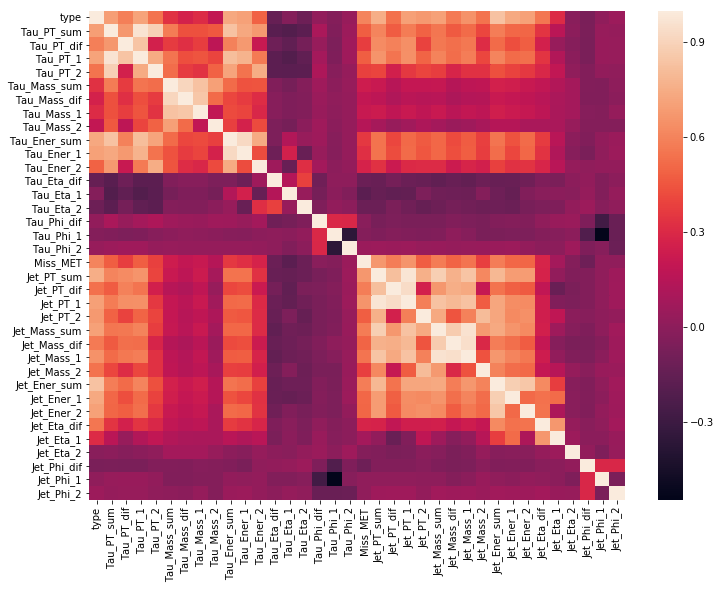

In [13]:
corrmat = train_test.corr()
f,ax =  plt.subplots(figsize=(12,9))
sb.heatmap(corrmat);

From the previous **heatmap**, first we can see that **Tau_Eta/Phi_1/2/dif** variables almost don't have any correlation with the other variables. 
Second, according to the *Vector Boson Fusion* Topology the **Jet_Eta_1/2/dif** variables should have great discrimination power, i.e. high correlation with type. However, it seems that these aren't the best ones at this stage (**Note: Jet_Eta_dif/1/2** have a great importance in the background clearing step, $C_0$ initial cuts). In contrast, other variables related with **Tranverse Momentum** could have better fit. 

Finally, as a result of the merging information process, there are a lot of group of variables that are highly correlated between them, e.g. **Jet_PT_sum/dif/1/2**, because they represent the same physical quantity. 

Let's look more in deeper to check which are the most important features (high correlation with **type**).

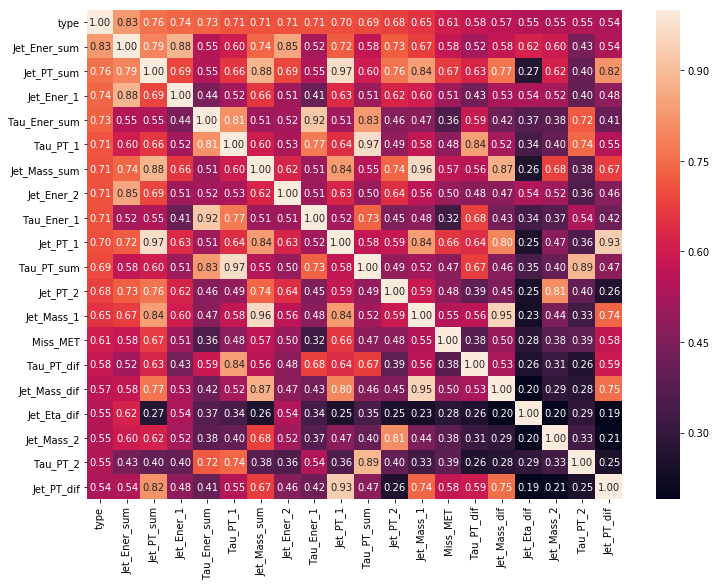

In [14]:
# Correlation matrix ordered by correlation with type

k = 20
f,ax =  plt.subplots(figsize=(12,9))
cols = corrmat.nlargest(k, 'type')['type'].index
cm = np.corrcoef(train_test[cols].values.T)
heatmap = sb.heatmap(cm,annot=True,fmt='.2f',yticklabels=cols.values,xticklabels=cols.values)

According to the previous ranking and avoiding *multicolinearity*, in each group of variables we can select the one with highest correlation with **type**:
    1. Jet_Ener_sum
    2. Jet_PT_sum
    3. Tau_PT_sum
    4. Jet_Mass_sum
    5. Miss_MET
    6. Tau_Ener_sum
    7. Jet_Eta_dif

In [15]:
X_train_test_selected = train_test[['Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
Y_train_test_selected = train_test['type']
train_test_selected = pd.concat([Y_train_test_selected,X_train_test_selected],axis=1)
train_test_selected.describe()

,type,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,0.500794,1167.781980,267.606790,284.142083,34.559058,106.261227,552.148033,3.698525
std,0.500198,1112.742152,252.871388,314.355747,32.726481,122.828483,520.091412,1.510475
min,0.000000,21.503100,16.497500,17.423500,1.573030,0.646361,19.889400,0.126601
25%,0.000000,158.663500,54.965100,58.370500,8.665890,25.172800,123.548750,2.612105
50%,1.000000,779.169000,166.634500,137.616000,20.708350,54.210150,380.508000,3.873085
75%,1.000000,1995.025000,446.365750,423.920000,53.094550,147.384250,879.349750,4.747490
max,1.000000,5498.690000,1272.920000,2530.560000,202.984000,740.094000,3179.850000,8.120860


### Separabilty of Data

To get a better approach to the data and how it is compound, it's possible to make a scatter plot across all variables (thanks to the feature selection we have less variables). The idea is to know how would be the best function that can divide the data between **signal** and **background** events.

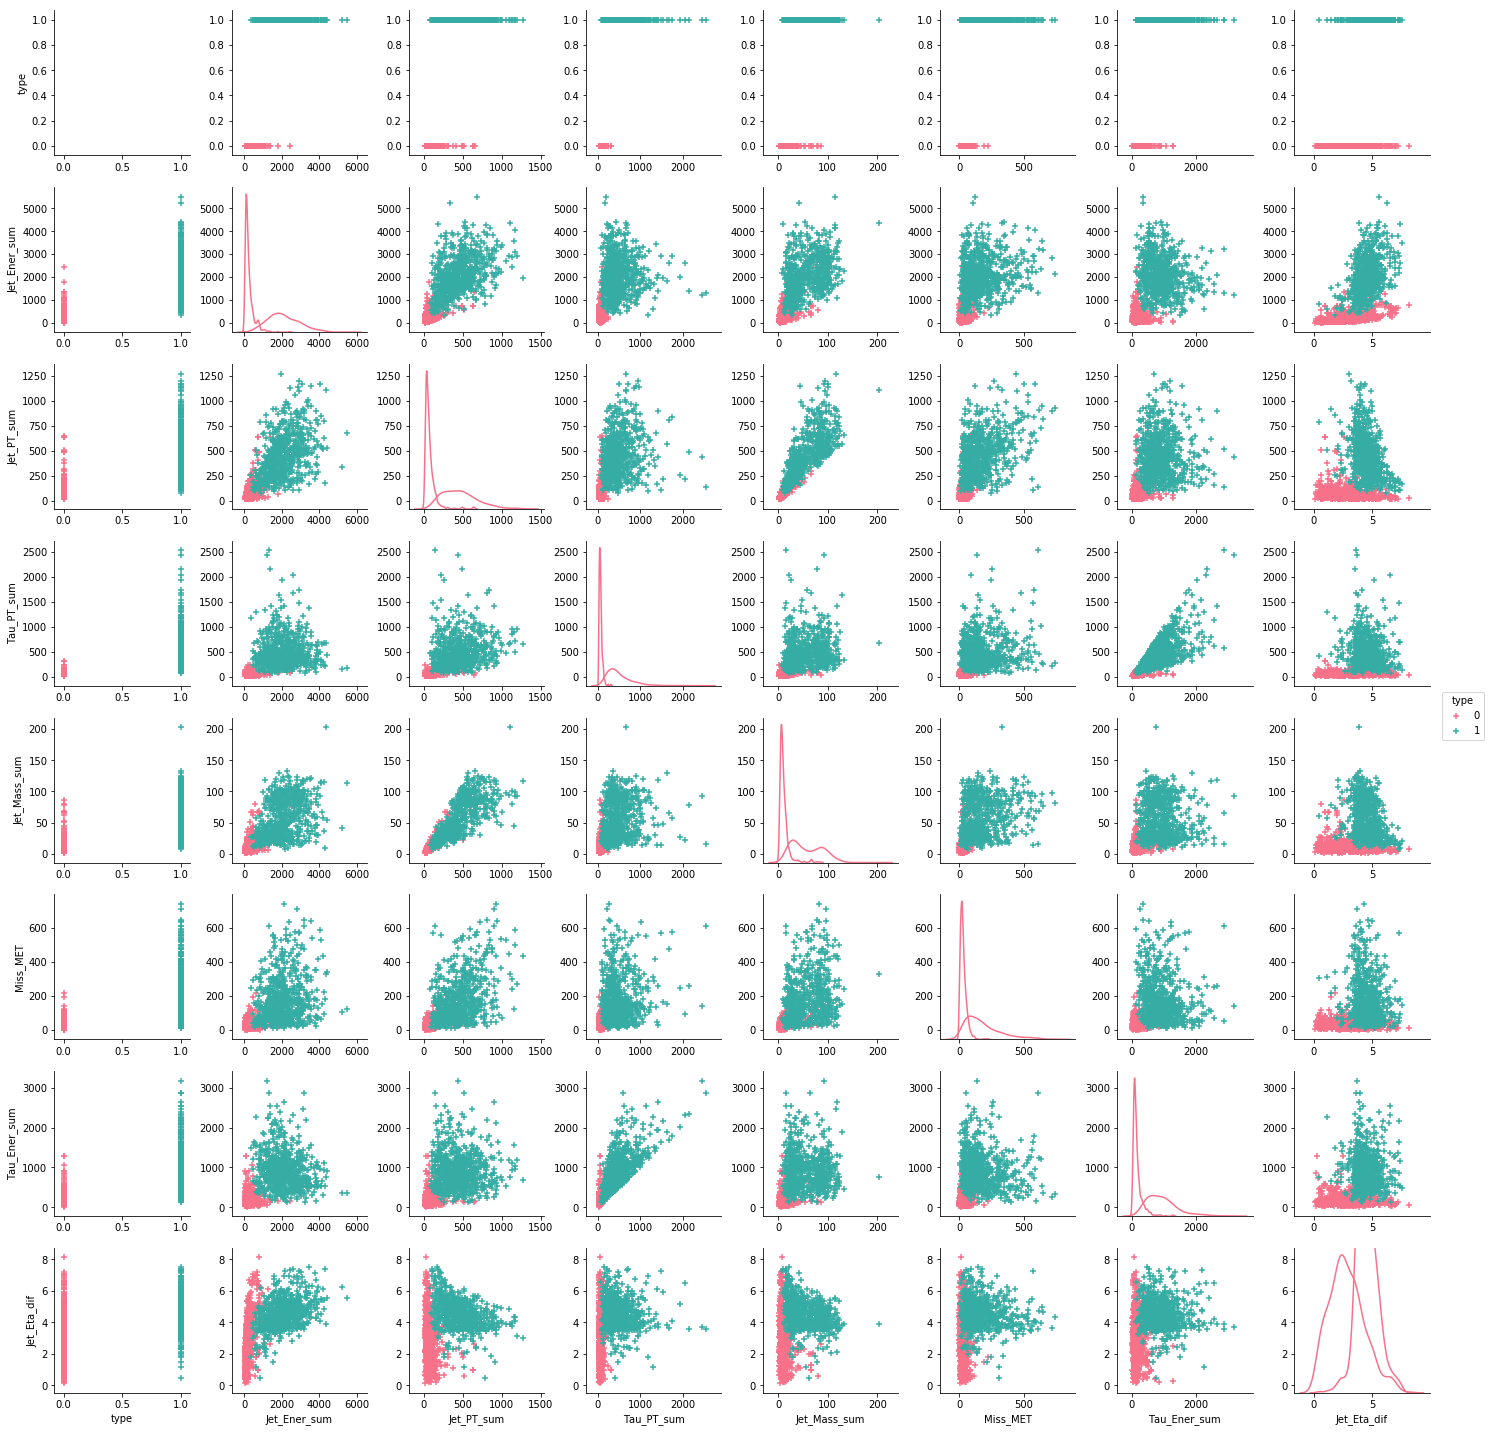

In [16]:
sb.pairplot(train_test_selected,hue='type',diag_kind='kde',palette='husl', markers='+');

The above graph shows that in some pair of variables it doesn't exist a linear function that can easily divide the data. Futhermore, as it's shown in the *Kernel distributions* plots over the diagonal, the background data is highly concentrated in some ranges. So to smoothe the variance of the data set over *type* of event, let's *log-transformated* the data (independent variables) in other to get a more comparable data by **type**.

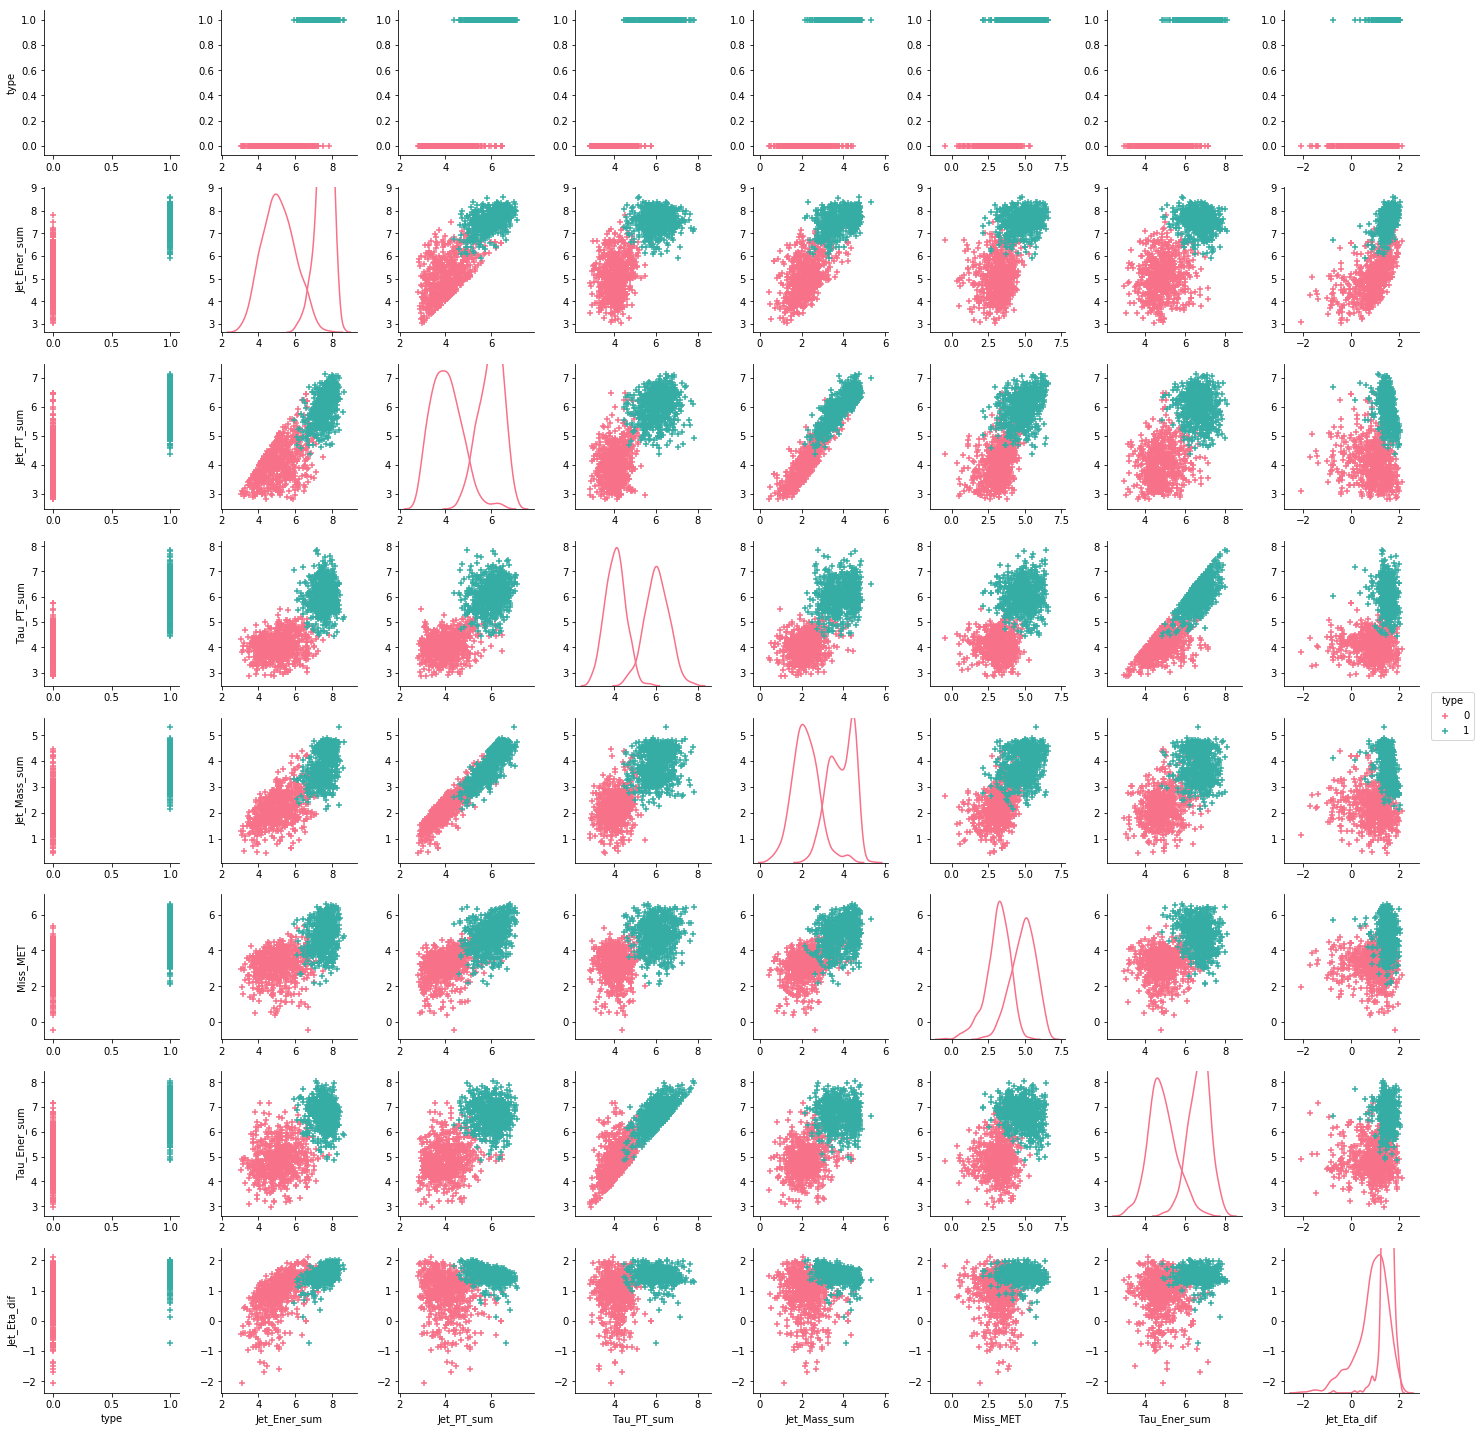

In [17]:
sb.pairplot(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),hue='type',diag_kind='kde',palette='husl',markers='+');

In this approach we can see a more clear separation than the previous figure, even it's possible to think that it would exist a linear function that can divide the data between **signal** and **background**

To confirm how has changed the data, let's see the empirical distributions before and after *log-transformation*.

In [18]:
def makeJoinHist(dataframe,varname):  
    leg =['1','0']
    fig, ax = plt.subplots()
    sb.distplot(dataframe[dataframe['type']==1][varname], ax = ax, label=r"$Z'\rightarrow \tau \tau$",color='b')
    sb.distplot(dataframe[dataframe['type']==0][varname], ax = ax, label='SM Background',color='r')
    fig.legend()

Text(0.5,1,u'Log-transformation')

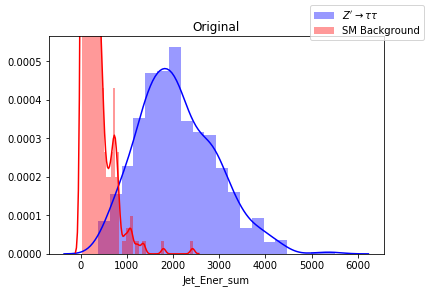

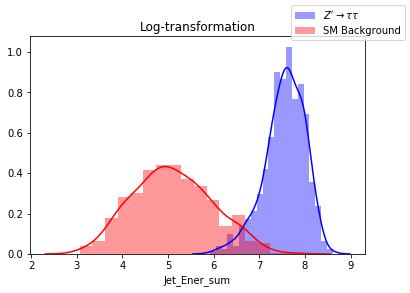

In [19]:
makeJoinHist(train_test_selected,'Jet_Ener_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_Ener_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

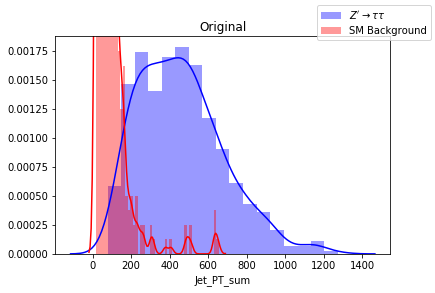

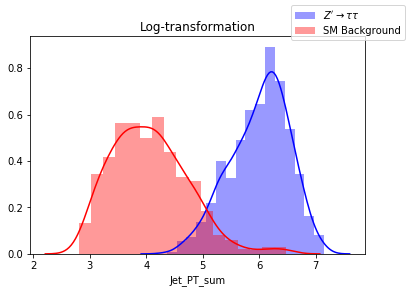

In [20]:
makeJoinHist(train_test_selected,'Jet_PT_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_PT_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

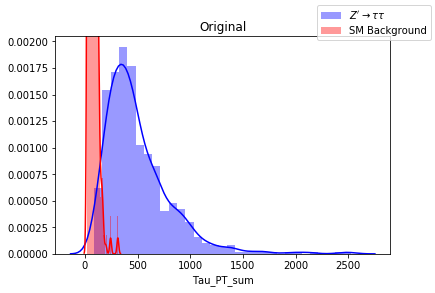

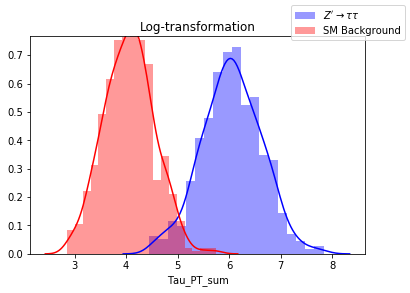

In [21]:
makeJoinHist(train_test_selected,'Tau_PT_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Tau_PT_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

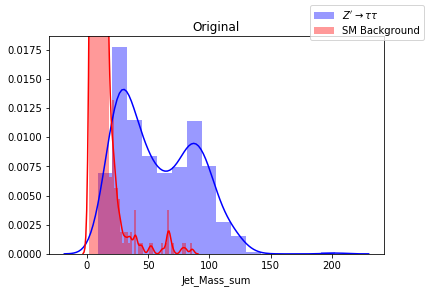

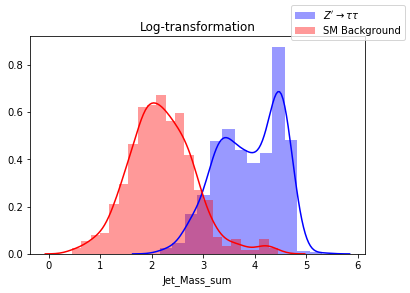

In [22]:
makeJoinHist(train_test_selected,'Jet_Mass_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_Mass_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

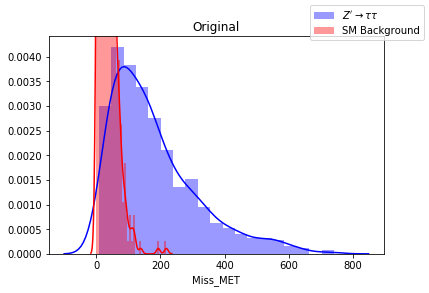

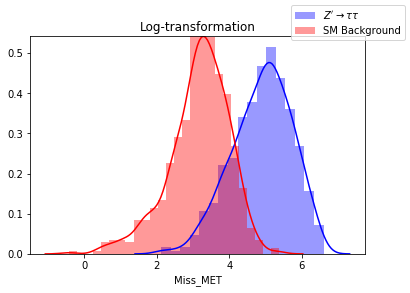

In [23]:
makeJoinHist(train_test_selected,'Miss_MET')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Miss_MET')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

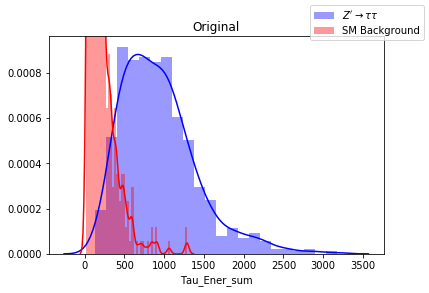

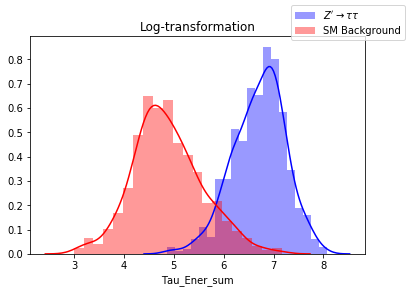

In [24]:
makeJoinHist(train_test_selected,'Tau_Ener_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Tau_Ener_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

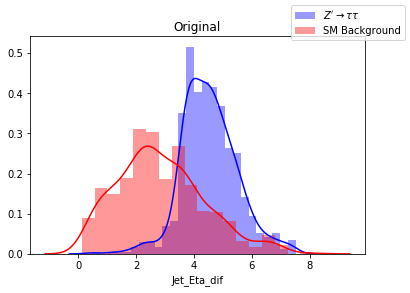

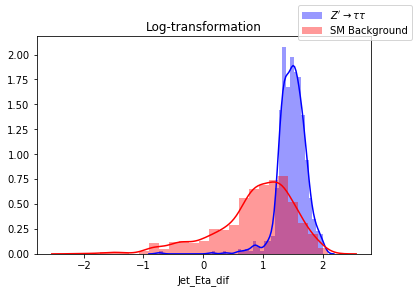

In [25]:
makeJoinHist(train_test_selected,'Jet_Eta_dif')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_Eta_dif')
plt.title("Log-transformation")

All variables have a significant improvement in the discrimination between the distributions of each **type** of event, except **Jet_Eta_dif**. Despite this, we would take the *log-transformation* of the whole ($X$ variables) selected data for simplicity. At the end, this would not affect our results.

In [26]:
X_log_train_test_selected = log(X_train_test_selected)
X_log_train_test_selected.describe()

,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.333705,5.034721,5.058373,3.043924,4.035254,5.793076,1.181260
std,1.403979,1.143069,1.128928,1.052555,1.195066,1.105485,0.583686
min,3.068197,2.803209,2.857820,0.453004,-0.436397,2.990187,-2.066715
25%,5.066786,4.006698,4.066810,2.159394,3.225761,4.816634,0.960156
50%,6.658228,5.115798,4.924464,3.030525,3.992868,5.941507,1.354051
75%,7.598412,6.101139,6.049545,3.972074,4.993043,6.779183,1.557616
max,8.612265,7.149069,7.836196,5.313127,6.606777,8.064589,2.094436


### Cross Validation Initialization

The data will be splitted between train and test samples in a $1:1$ relation

In [27]:
X_log_train, X_log_test, Y_train, Y_test = train_test_split(X_log_train_test_selected,Y_train_test_selected,test_size=.5)
X_log_train.describe()

,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,6.284934,5.021740,5.044102,3.028175,4.075798,5.781243,1.165136
std,1.435311,1.160302,1.154232,1.066105,1.156237,1.134488,0.590055
min,3.068197,2.830639,2.857820,0.495294,0.599023,2.990187,-1.688097
25%,4.967785,3.981708,4.025429,2.114111,3.239387,4.732640,0.933624
50%,6.624125,5.066972,4.881701,2.993192,3.995579,5.944714,1.342397
75%,7.586069,6.097972,6.098922,3.985733,5.023263,6.783470,1.534948
max,8.389712,7.149069,7.836196,5.313127,6.463558,8.064589,2.016194


#### Normalization

To introduce the data in the model, it must be normalized. So after we split the data, the first and second momentum of the distributions must be:

$$\mu = 0$$ and $$\sigma = 1$$

In [28]:
from sklearn.preprocessing import StandardScaler

def normalizeMyDataFrameX(dataFrame,scaler):
    scale_dataFrame = scaler.transform(dataFrame)
    scale_dataFrame = pd.DataFrame(scale_dataFrame)
    scale_dataFrame.columns = dataFrame.columns
    return scale_dataFrame

def normalizeMyDataFrameXY(dataFrame,scaler):
    X_dataFrame = dataFrame.drop(['type'],axis=1) 
    X_scale_dataFrame = scaler.transform(X_dataFrame)
    X_scale_dataFrame = pd.DataFrame(X_scale_dataFrame)
    X_scale_dataFrame.columns = X_dataFrame.columns
    return pd.concat([dataFrame['type'],X_scale_dataFrame],axis=1)

In [29]:
# Get Scaler from training data 
scaler = StandardScaler().fit(X_log_train)

# Scale trainning set
X_scale_log_train = normalizeMyDataFrameX(X_log_train,scaler)
Y_train.reset_index(drop=True, inplace=True)
scale_log_train = pd.concat([pd.DataFrame(Y_train),X_scale_log_train],axis=1)

# Scale test set 
X_scale_log_test = normalizeMyDataFrameX(X_log_test,scaler)
Y_test.reset_index(drop=True, inplace=True)
scale_log_test = pd.concat([pd.DataFrame(Y_test),X_scale_log_test],axis=1)

# Scale the validation test 
X_validation_selected = X_validation[['Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
X_log_validation_selected = log(X_validation_selected)
X_scale_log_validation = scaler.transform(X_log_validation_selected)

# Model Implementation

### Logistic Regression

The first model to implement supposse a linear separation of data.

In [30]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_scale_log_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
Y_pred_logReg = logReg.predict(X_scale_log_test)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_logReg)
confusion_matrix_TT

array([[310,   3],
       [  0, 317]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_logReg))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       313
          1       0.99      1.00      1.00       317

avg / total       1.00      1.00      1.00       630



#### Cross validation set

In [34]:
Y_pred_logReg_validation = logReg.predict(X_scale_log_validation)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_logReg_validation)
confusion_matrix_V

array([[159,   0],
       [  0, 157]])

In [35]:
print(classification_report(Y_validation,Y_pred_logReg_validation))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       159
          1       1.00      1.00      1.00       157

avg / total       1.00      1.00      1.00       316



### Neural Network - MultiLayer Perceptron

The second model with higher complexity incorporate some non-linearities that could have a better fitting of the data.

In [36]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(7,5,3),max_iter=500)
clf.fit(X_scale_log_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [37]:
Y_pred_NN = clf.predict(X_scale_log_test)

In [38]:
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_NN)
confusion_matrix_TT

array([[310,   3],
       [  0, 317]])

In [39]:
print(classification_report(Y_test,Y_pred_NN))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       313
          1       0.99      1.00      1.00       317

avg / total       1.00      1.00      1.00       630



#### Cross validation set

In [40]:
Y_pred_NN_validation = clf.predict(X_scale_log_validation)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_NN_validation)
confusion_matrix_V

array([[159,   0],
       [  0, 157]])

In [41]:
print(classification_report(Y_validation,Y_pred_NN_validation))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       159
          1       1.00      1.00      1.00       157

avg / total       1.00      1.00      1.00       316



### Support Vector Machine

The last model assumes a gaussian kernel to separate data

In [42]:
from sklearn import svm
svmodel = svm.SVC(C=25,kernel = 'rbf')
svmodel.fit(X_scale_log_train,Y_train)

SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
Y_pred_SVM = svmodel.predict(X_scale_log_test)

In [44]:
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_SVM)
confusion_matrix_TT

array([[311,   2],
       [  1, 316]])

In [45]:
print(classification_report(Y_test,Y_pred_SVM))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       313
          1       0.99      1.00      1.00       317

avg / total       1.00      1.00      1.00       630



#### Cross validation set

In [46]:
Y_pred_SVM_validation = svmodel.predict(X_scale_log_validation)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_SVM_validation)
confusion_matrix_V

array([[159,   0],
       [  1, 156]])

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation,Y_pred_SVM_validation))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       159
          1       1.00      0.99      1.00       157

avg / total       1.00      1.00      1.00       316



# Final model

Now, we want to choose the best model. Cause the three models get fairly the same high accuracy, the selection criteria will be to choose the simplest one, i.e. Logistic regression. But, after we continue (just for fun), let's try to implement the model with the data that have the *log-transformation* but without normalitzation:

### Logistic regression without normalized data 

In [48]:
logRegWoN = LogisticRegression()
logRegWoN.fit(X_log_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
Y_pred_logRegWoN = logRegWoN.predict(X_log_test)

In [50]:
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_logRegWoN)
confusion_matrix_TT

array([[299,  14],
       [  6, 311]])

In [51]:
print(classification_report(Y_test,Y_pred_logRegWoN))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97       313
          1       0.96      0.98      0.97       317

avg / total       0.97      0.97      0.97       630



### Cross validation set

In [52]:
Y_pred_logRegWoN_validation = logRegWoN.predict(X_log_validation_selected)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_logRegWoN_validation)
confusion_matrix_V

array([[158,   1],
       [  1, 156]])

In [53]:
print(classification_report(Y_validation,Y_pred_logRegWoN_validation))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       159
          1       0.99      0.99      0.99       157

avg / total       0.99      0.99      0.99       316



Thanks to the *log-transformation* we could take the model without normalizing data, and keep almost the same results.

In [54]:
final_model = logReg

# Significance 

In [55]:
def GetExpectedNumberEvents(dataframe,model,N,cross_section,luminosity):
    X_dataframe = dataframe.drop(['type'],axis=1)
    Y_dataframe= dataframe['type']
    
    Y_pred = model.predict(X_dataframe)    
    n = 1.0*sum(Y_pred)
    N1 = Y_dataframe.count()
    efficiency = n/N
    N_event = efficiency*cross_section*luminosity

    print "From the initial N =", N, "events, it were selected N1 =", N1, "events with the C0 cuts"
    print "From the N1 =", N1, "events, it were selected n =", n, "events by the MVA"
    print "The final Efficiency of detection is : ", efficiency*100, " %"
    print "The expected number of events is: ", N_event
    
    return N_event

## Signal

In [56]:
# Import random sample from ROOTç
fullSignal = pd.read_csv(folder_full+signal_filename+'.csv')
fullSignal.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,788.0,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,...,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,1.0,494.859057,197.426432,346.142738,148.716315,15.621173,4.804770,10.212973,5.408203,934.612782,...,15.432412,2077.621270,1136.638102,940.983088,-0.087869,-0.053521,0.034348,0.020432,-0.004074,-0.024505
std,0.0,301.386018,169.517164,204.312476,134.317357,19.602995,17.112801,14.488620,11.342092,477.652402,...,11.454961,836.802345,604.871596,592.599740,4.613446,2.024601,2.734575,2.534911,1.825506,1.872812
min,1.0,85.648000,0.345154,50.787900,22.862200,-0.000024,-146.371000,-0.000026,-0.000019,129.457000,...,0.408254,371.986000,143.125000,48.646300,-7.393250,-4.003640,-4.781300,-6.120490,-3.135710,-3.138040
25%,1.0,294.792000,71.314325,196.152500,64.044625,5.694432,-0.600901,2.854278,1.221945,577.970250,...,8.216992,1476.997500,728.087000,518.855750,-4.471885,-1.910667,-2.567932,-1.618173,-1.529135,-1.668105
50%,1.0,424.024000,154.520500,300.468000,107.922000,10.486750,2.875610,6.302495,2.792640,858.218500,...,12.502550,1985.950000,1040.615000,794.120500,-2.162545,-0.351119,0.474359,0.100631,-0.005539,-0.077482
75%,1.0,622.496750,280.444000,432.201250,181.836250,19.262900,7.528153,11.960050,6.079582,1175.140000,...,19.151275,2637.100000,1406.912500,1277.210000,4.417955,1.827048,2.618372,1.750700,1.585212,1.640557
max,1.0,2530.560000,914.019000,1635.220000,1124.590000,250.382000,150.153000,156.786000,198.377000,3179.850000,...,79.342900,5498.690000,4403.320000,3249.830000,7.509690,4.287900,4.456740,6.059940,3.107620,3.137270


In [57]:
fullSignal['type'][fullSignal['Jet_Mass_sum']<=0].count()

0

In [58]:
full_signal= fullSignal[['type','Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
full_signal_abs = full_signal.abs()
full_signal_abs = full_signal_abs[full_signal_abs['Jet_Mass_sum']>0]
full_signal_abs.describe()

,type,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,788.0,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,1.0,2077.621270,459.371337,494.859057,57.831214,181.132305,934.612782,4.512474
std,0.0,836.802345,218.042960,301.386018,30.870212,136.110189,477.652402,0.950433
min,1.0,371.986000,78.464000,85.648000,7.017240,8.295800,129.457000,0.479316
25%,1.0,1476.997500,283.818750,294.792000,30.404800,79.669700,577.970250,3.892500
50%,1.0,1985.950000,441.086500,424.024000,52.226500,147.769000,858.218500,4.449885
75%,1.0,2637.100000,587.663500,622.496750,85.251425,240.342250,1175.140000,5.072998
max,1.0,5498.690000,1272.920000,2530.560000,202.984000,740.094000,3179.850000,7.509690


In [59]:
# Divide Data
X_full_signal_abs = full_signal_abs.drop(['type'],axis=1)
Y_full_signal_abs = full_signal_abs['type']
# Scale Data
scale_full_signal_abs = pd.concat([Y_full_signal_abs,normalizeMyDataFrameX(log(X_full_signal_abs),scaler)],axis=1)

In [60]:
luminosity = 1000.0 # femtoBarns^-1

In [61]:
cross_section_signal = 1.78237773161*1000 ## femtoBarns
N0_signal = 30255
N_signal = GetExpectedNumberEvents(scale_full_signal_abs,final_model,N0_signal,cross_section_signal,luminosity)

From the initial N = 30255 events, it were selected N1 = 788 events with the C0 cuts
From the N1 = 788 events, it were selected n = 788.0 events by the MVA
The final Efficiency of detection is :  2.60452817716  %
The expected number of events is:  46422.5302432


## Background: W+jets

In [62]:
# Import random sample from ROOT
full_back1 = pd.read_csv(folder_full+'W+jets.root.csv')
full_back1.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,3102.0,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,...,3.102000e+03,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000
mean,0.0,64.370378,25.753044,45.061708,19.308670,7.040173,1.974735,4.507454,2.532719,194.562990,...,3.982038e+00,271.376293,169.011378,102.364936,0.019167,0.002963,-0.016204,-0.037888,-0.018171,0.019718
std,0.0,45.057594,31.692253,36.423684,13.806074,5.645581,5.648793,5.263412,2.046268,196.158686,...,3.851738e+00,291.022240,237.192280,162.045617,3.316004,1.665344,1.967880,2.686428,1.826214,1.838830
min,0.0,17.386300,0.031517,8.708890,7.490790,-0.000001,-18.181800,-0.000009,-0.000022,19.889400,...,1.192090e-07,21.308500,9.045500,8.713780,-8.120860,-4.710270,-4.892910,-6.078060,-3.138790,-3.139800
25%,0.0,37.096275,7.255715,23.726425,10.586700,3.724973,-1.181212,1.397795,1.302863,80.221675,...,1.949458e+00,92.663800,46.120850,21.347500,-2.772567,-1.131935,-1.439547,-2.244652,-1.597538,-1.598820
50%,0.0,51.884450,16.375700,35.332300,14.899200,5.478335,0.679751,2.770605,2.117165,130.633000,...,2.935150e+00,171.030000,88.625600,44.007850,0.218180,0.010883,-0.021971,-0.129955,-0.006472,0.082300
75%,0.0,74.989625,31.606300,51.976225,22.954675,8.621115,3.992420,5.890165,3.117893,232.606000,...,4.735050e+00,333.624250,189.941500,104.469750,2.753658,1.136588,1.336653,2.210685,1.560223,1.616240
max,0.0,555.872000,345.203000,384.483000,213.543000,86.289000,84.306900,85.298000,21.089700,2215.190000,...,8.088760e+01,2660.860000,2570.650000,2002.720000,8.019250,4.657320,4.872290,5.978240,3.141330,3.138990


In [63]:
full_back1['type'][full_back1['Jet_Mass_sum']<=0].count()

0

In [64]:
full_back1 = full_back1[['type','Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
full_back1_abs = full_back1.abs()
full_back1_abs = full_back1_abs[full_back1_abs['Jet_Mass_sum']>0]
full_back1_abs.describe()

,type,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,3102.0,3102.000000,3102.000000,3102.000000,3.102000e+03,3102.000000,3102.000000,3102.000000
mean,0.0,271.376293,79.907653,64.370378,1.189161e+01,44.865505,194.562990,2.927760
std,0.0,291.022240,71.130104,45.057594,9.235108e+00,35.227026,196.158686,1.556184
min,0.0,21.308500,15.871200,17.386300,5.057620e-07,1.357990,19.889400,0.036885
25%,0.0,92.663800,37.900975,37.096275,6.279577e+00,23.189150,80.221675,1.752560
50%,0.0,171.030000,59.706400,51.884450,9.397455e+00,36.994650,130.633000,2.769865
75%,0.0,333.624250,96.735175,74.989625,1.439043e+01,55.960475,232.606000,3.917265
max,0.0,2660.860000,972.948000,555.872000,1.012380e+02,518.169000,2215.190000,8.120860


In [65]:
# Divide Data
X_full_back1_abs = full_back1_abs.drop(['type'],axis=1)
Y_full_back1_abs = full_back1_abs['type']
# Scale Data
scale_full_back1_abs = pd.concat([Y_full_back1_abs,normalizeMyDataFrameX(log(X_full_back1_abs),scaler)],axis=1)

In [66]:
cross_section_back1 = 32000000 # femtobarns
N0_back1 = 43075659
N_back1 = GetExpectedNumberEvents(scale_full_back1_abs,final_model,N0_back1,cross_section_back1,luminosity)

From the initial N = 43075659 events, it were selected N1 = 3102 events with the C0 cuts
From the N1 = 3102 events, it were selected n = 69.0 events by the MVA
The final Efficiency of detection is :  0.000160183271949  %
The expected number of events is:  51258.6470238


## Background: DY+jets

In [67]:
# Import random sample from ROOT
full_back2 = pd.read_csv(folder_full+'DY+jets.root.csv')
full_back2.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,351786.0,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000,...,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000,351786.000000
mean,0.0,71.336963,22.439926,46.888444,24.448519,4.199023,0.917313,2.558168,1.640855,142.155381,...,3.455981,232.296344,139.022533,93.273812,-0.001234,-0.002277,-0.001043,-0.002934,0.000642,0.003575
std,0.0,32.526270,23.788341,25.806925,12.079913,4.052277,3.707351,3.513106,1.655532,96.169818,...,3.099124,261.431897,205.237028,152.980449,3.267171,1.610520,1.990548,2.630395,1.813848,1.814557
min,0.0,16.530500,0.000000,8.396840,7.490200,-17.916000,-36.838100,-17.916000,-6.229470,19.674300,...,-0.000011,17.579000,8.640030,8.571300,-9.809600,-4.970320,-4.997440,-6.244140,-3.141560,-3.141590
25%,0.0,51.042875,7.343288,31.528225,15.849825,2.149323,-0.627592,1.018683,0.802853,83.884650,...,1.813600,81.647050,38.326650,20.360800,-2.759995,-1.086168,-1.414235,-2.072170,-1.569150,-1.563885
50%,0.0,66.385200,16.155450,41.821200,22.430550,3.212315,0.417308,1.689730,1.290290,114.023000,...,2.602355,146.315000,73.191450,40.852550,-0.144662,-0.003994,0.004849,-0.007462,0.001309,0.006204
75%,0.0,84.145850,29.664175,55.052200,30.447200,4.828645,1.631760,2.831142,2.021665,169.568750,...,4.076000,279.325500,150.771000,96.492050,2.762190,1.081298,1.412158,2.068302,1.574900,1.575333
max,0.0,809.499000,787.944000,798.722000,328.724000,171.481000,168.880000,170.181000,58.252800,3209.550000,...,123.220000,5677.790000,5236.200000,4793.810000,9.590170,4.978050,5.001580,6.267820,3.141580,3.141580


In [68]:
full_back2['type'][full_back2['Jet_Mass_sum']<=0].count()

34

In [69]:
full_back2 = full_back2[['type','Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
full_back2_abs = full_back2.abs()
full_back2_abs = full_back2_abs[full_back2_abs['Jet_Mass_sum']>0]

In [70]:
# Divide Data
X_full_back2_abs = full_back2_abs.drop(['type'],axis=1)
Y_full_back2_abs = full_back2_abs['type']
# Scale Data
scale_full_back2_abs = pd.concat([Y_full_back2_abs,normalizeMyDataFrameX(log(X_full_back2_abs),scaler)],axis=1)

In [71]:
cross_section_back2 = 2240000 # femtoBarns
N0_back2 = 29196813
N_back2 = GetExpectedNumberEvents(scale_full_back2_abs,final_model,N0_back2,cross_section_back2,luminosity)

From the initial N = 29196813 events, it were selected N1 = 351786 events with the C0 cuts
From the N1 = 351786 events, it were selected n = 3232.0 events by the MVA
The final Efficiency of detection is :  0.0110697013403  %
The expected number of events is:  247961.310024


## Background: $t\bar{t}$ production

We can approximate the expected number of events for $t\bar{t}$ production with $W+jets$ events.

In [72]:
N_back3 = N_back1

In [73]:
sigma = N_signal/10/((N_signal+N_back1+N_back2+N_back3))**0.5
print "sigma : ", sigma

sigma :  7.36864506461
